In [ ]:
pip install -U fortran-magic

In [ ]:
%reload_ext fortranmagic

In [9]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

ModuleNotFoundError: ignored

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

NameError: ignored

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

IndexError: ignored

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time

matmul(a, b)

IndexError: ignored

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    if len(A[0]) != len(B):
      print("Las matrices no son compatibles para multiplicarse")
      return

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time

matmul(a, b)

Matrix dimensions aren't compatible for multiplication
CPU times: user 0 ns, sys: 554 µs, total: 554 µs
Wall time: 488 µs


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[3, 4, 6],
     [3, 2, 5],
     [4, 7, 9],
     [77, 25, 98]]

b = [[20, 60, 51, 62],
     [33, 74, 59, 65],
     [78, 15, 64, 44]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time

matmul(a, b)

CPU times: user 40 µs, sys: 1 µs, total: 41 µs
Wall time: 45.1 µs


[[660, 566, 773, 710],
 [516, 403, 591, 536],
 [1013, 893, 1193, 1099],
 [10009, 7940, 11674, 10711]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

0.6598532355154961

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.637556547641239, 0.6116579063719976, 2.0856791467238622e-05],
 [0.8078775592554156, 0.6096981700169831, 0.5355670363067694]]

In [ ]:
%%time
randa = random_matrix(600,100)
randb = random_matrix(100,600)
z = matmul(randa, randb)

CPU times: user 7.79 s, sys: 19.4 ms, total: 7.81 s
Wall time: 8.22 s


**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time

randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

n = 10
promedio = 0
for i in range(n):

  start = time.process_time()
  randc = matmul(randa, randb)
  end = time.process_time()
  promedio += end-start
promedio /= 10

print(promedio)

8.692026259399999


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
dict = {'Lenguaje':['Python'],
        'Promedio de segundos':[promedio],
        }

df = pd.DataFrame(dict)
display(df)

,Lenguaje,Promedio de segundos
0,Python,8.692026


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import time

matrix_a = np.array(randa)
matrix_b = np.array(randb)
iterations = 10
average_time = 0
df = pd.DataFrame(columns=['Library', 'Average Time'])

for _ in range(iterations):
    start_time = time.process_time()
    result_matrix = matrix_a @ matrix_b
    end_time = time.process_time()
    average_time += end_time - start_time

average_time /= iterations

df.loc[len(df.index)] = ['NumPy', average_time]

display(df)

,Lenguaje,Promedio de segundos
0,Python,8.692026
1,Numpy,0.009238


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 7.64 s, sys: 21.8 ms, total: 7.66 s
Wall time: 7.69 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

The extension _fortran_magic_84425f332d509b017675d294ee2e5bde is already loaded. To reload it, use:
  %fortran_config --clean-cache


In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 13.3 ms, sys: 992 µs, total: 14.3 ms
Wall time: 18.2 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 178 µs, sys: 2 µs, total: 180 µs
Wall time: 185 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = [[12, 21],
    [34, 43]]

B = [[36, 63],
     [58, 85]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine matrix_multiplication(matrix1, matrix2, result_matrix)
     double precision, dimension(:,:), intent(in) :: matrix1
     double precision, dimension(:,:), intent(in) :: matrix2
     double precision, dimension(2,2), intent(out) :: result_matrix

  result_matrix = matmul(matrix1, matrix2)

end

The extension _fortran_magic_7fedfefe5ec6a1b20f289e43e4091ef4 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time
matrix_multiplication(A,B)


CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 39.8 µs


array([[1650., 2541.],
       [3718., 5797.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine custom_matrix_multiplication(matrix1, matrix2, result_matrix)
    double precision, dimension(:,:), intent(in) :: matrix1
    double precision, dimension(:,:), intent(in) :: matrix2
    double precision, dimension(600,600), intent(out) :: result_matrix

    result_matrix = matmul(matrix1, matrix2)

end subroutine custom_matrix_multiplication

The extension _fortran_magic_71ebe512b8b15845f17c64e5391a0f20 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time
custom_matrix_multiplication(randa,randb)

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 17.4 ms


array([[22.67020481, 23.09763909, 23.80781047, ..., 25.84427645,
        25.75075516, 23.57581409],
       [21.47382655, 24.60188757, 24.00050403, ..., 27.8982493 ,
        25.04191014, 23.75085146],
       [21.22697337, 22.07087105, 24.62765271, ..., 26.15362397,
        24.64288352, 23.38000369],
       ...,
       [24.66229563, 26.67810976, 26.4569331 , ..., 29.98048212,
        28.61375966, 25.62822945],
       [24.06144477, 24.09932145, 23.69537392, ..., 27.98303332,
        27.63963451, 23.79749622],
       [25.07984382, 24.3850736 , 25.61524524, ..., 29.91316376,
        27.86363931, 25.18069038]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time
_ = 10
promedio = 0
for i in range(_):
  start = time.process_time()
  custom_matrix_multiplication(randa, randb)
  end = time.process_time()
  promedio += end - start
promedio = promedio/10
df.loc[len(df.index)] = ['Fortran', promedio]
display(df)

,Lenguaje,Promedio de segundos
0,Python,8.692026
1,Numpy,0.009238
2,Fortran,0.011642


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile fortran.f
        program MatrixMultiplication

    integer :: numRowsA = 600
    integer :: numColsA = 100
    integer :: numRowsB = 600

    real :: elapsed_time, total_time

    integer :: i, j, k, iteration

    double precision, dimension(600,100) :: matrixA
    double precision, dimension(100,600) :: matrixB
    double precision, dimension(600,600) :: resultMatrix

    do i = 1, numRowsA
        do j = 1, numColsA
           matrixA(i, j) = i + j * 0.1
        end do
    end do

   do i = 1, numColsA
         do j = 1, numRowsB
            matrixB(i, j) = i + j * 0.5
         end do
   end do

   elapsed_time = 0.0

   do iteration = 1, 10
       call cpu_time(total_time)
       resultMatrix = matmul(matrixA, matrixB)
       call cpu_time(elapsed_time)
       elapsed_time = elapsed_time - total_time
   end do
   elapsed_time = elapsed_time / 10.0

   PRINT *, elapsed_time
   stop
end program

Writing fortran.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran fortran.f -o fortran
!./fortran

   5.56389987E-03


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
df.loc[len(df.index)] = ['FortranMagic', 5.56389987E-03]
display(df)

,Lenguaje,Promedio de segundos
0,Python,8.692026
1,Numpy,0.009238
2,Fortran,0.011642
3,FortranMagic,0.005564


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile c.c

#include <stdio.h>
#include <time.h>
#include <fstream>

#define ROWS 600
#define COLS_A 100
#define COLS_B 600
float totalTime = 0.0;

void Multiplicar(float matrixA[][COLS_A], float matrixB[][COLS_B], float resultMatrix[][COLS_B], int numIterations) {
  int i, j, k;

  for (int iteration = 0; iteration < numIterations; iteration++) {
    clock_t startTime = clock();
    for (i = 0; i < ROWS; i++) {
      for (j = 0; j < COLS_B; j++) {
        resultMatrix[i][j] = 0.0;
        for (k = 0; k < COLS_A; k++) {
          resultMatrix[i][j] += matrixA[i][k] * matrixB[k][j];
        }
      }
    }
    clock_t endTime = clock();
    float elapsed_time = ((float) (endTime - startTime)) / CLOCKS_PER_SEC;
    totalTime += elapsed_time;
  }
}

int main() {
  float matrixA[ROWS][COLS_A], matrixB[COLS_A][COLS_B], resultMatrix[ROWS][COLS_B];
  float averageTime;

  // Inicializar las matrices A y B
  for (int i = 0; i < ROWS; i++) {
    for (int j = 0; j < COLS_A; j++) {
      matrixA[i][j] = i + j;
      matrixB[j][i] = i - j;
    }
  }

  int numIterations = 10;
  Multiplicar(matrixA, matrixB, resultMatrix, numIterations);
  averageTime = totalTime / numIterations;

  printf("%f", averageTime);

  return 0;
}

Overwriting c.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell
g++ c.c -o output
./output

0.162149

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
df.loc[len(df.index)] = ['C', 0.162149]
display(df)

,Lenguaje,Promedio de segundos
0,Python,8.692026
1,Numpy,0.009238
2,Fortran,0.011642
3,FortranMagic,0.005564
4,C,0.162149


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile c++.cpp
  #include <stdio.h>
#include <stdlib.h>
#include <time.h>

void fillMatrix(int **matrix, int numRows, int numCols);
void matrixMultiplication(int **matrixA, int **matrixB, int **resultMatrix, int numRows, int numCols);
double calculateAverageTime(int **matrixA, int **matrixB, int **resultMatrix, int numRows, int numCols, int repetitions);

int main(void) {
    FILE *outputFile;
    int numRows = 600;
    int numCols = 100;

    int **matrixA;
    int **matrixB;
    int **resultMatrix;
    unsigned int repetitions = 10;
    double averageTime = 0.0;

    // Matrix pointers
    matrixA = (int **) malloc(numRows * sizeof(int *));
    for(int i = 0; i < numRows; i++){
        matrixA[i] = (int *) malloc(numCols * sizeof(int));
    }

    matrixB = (int **) malloc(numCols * sizeof(int *));
    for(int i = 0; i < numCols; i++){
        matrixB[i] = (int *) malloc(numRows * sizeof(int));
    }

    resultMatrix = (int **) malloc(numRows * sizeof(int *));
    for(int i = 0; i < numRows; i++){
        resultMatrix[i] = (int *) malloc(numRows * sizeof(int));
    }

    // Fill matrices
    fillMatrix(matrixA, numRows, numCols);
    fillMatrix(matrixB, numCols, numRows);

    // Matrix multiplication repetitions
    averageTime = calculateAverageTime(matrixA, matrixB, resultMatrix, numRows, numCols, repetitions);
    printf("Average in C++: %f seconds\n", averageTime);

    // Write average into a file
    outputFile = fopen("c_plus_average.txt", "w");
    fprintf(outputFile, "%f", averageTime);
    fclose(outputFile);

    return 0;
}

void fillMatrix(int **matrix, int numRows, int numCols) {
    for(int i = 0; i < numRows; i++) {
        for(int j = 0; j < numCols; j++) {
            matrix[i][j] = rand();
        }
    }
    return;
}

double calculateAverageTime(int **matrixA, int **matrixB, int **resultMatrix, int numRows, int numCols, int repetitions) {
    clock_t start, end;
    double average = 0.0;
    double executionTime = 0.0;

    for(int i = 0; i < repetitions; i++) {
        start = clock();
        matrixMultiplication(matrixA, matrixB, resultMatrix, numRows, numCols);
        end = clock();
        executionTime = ((double)(end - start)) / CLOCKS_PER_SEC;
        average += executionTime;
        printf("Case %d -> %f seconds\n", i + 1, executionTime);
    }
    return average / ((double) repetitions);
}

void matrixMultiplication(int **matrixA, int **matrixB, int **resultMatrix, int numRows, int numCols) {
    for(int i = 0; i < numRows; i++) {
        for(int j = 0; j < numRows; j++) {
            for(int k = 0; k < numCols; k++) {
                resultMatrix[i][j] += matrixA[i][k] * matrixB[k][j];
            }
        }
    }
    return;
}

Overwriting c++.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ c++.cpp -o c++
!./c++

Case 1 -> 0.203326 seconds
Case 2 -> 0.199977 seconds
Case 3 -> 0.195408 seconds
Case 4 -> 0.216188 seconds
Case 5 -> 0.200937 seconds
Case 6 -> 0.202630 seconds
Case 7 -> 0.193321 seconds
Case 8 -> 0.191963 seconds
Case 9 -> 0.209111 seconds
Case 10 -> 0.202823 seconds
Average in C++: 0.201568 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
df.loc[len(df.index)] = ['C++', 0.201568]
display(df)

,Lenguaje,Promedio de segundos
0,Python,8.692026
1,Numpy,0.009238
2,Fortran,0.011642
3,FortranMagic,0.005564
4,C,0.162149
5,C++,0.201568


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile java_m.java

import java.util.Random;
import java.io.FileWriter;
import java.io.IOException;

class MatrixMultiplication {

  public static void main(String[] args) {
    int rowsA = 600;
    int colsA = 100;
    int colsB = 600;
    int repetitions = 10;

    int[][] matrixX = new int[rowsA][colsA];
    int[][] matrixY = new int[colsA][colsB];
    int[][] resultMatrix = new int[rowsA][colsB];

    // Fill matrices
    populateMatrix(matrixX, rowsA, colsA);
    populateMatrix(matrixY, colsA, colsB);

    // Matrix multiplication repetitions
    double avgTime = calculateAverageTime(matrixX, matrixY, resultMatrix, rowsA, colsA, colsB, repetitions);
    System.out.println("Average time in Java: " + avgTime + " seconds");

    // Write average time to file
    try {
      FileWriter fileWriter = new FileWriter("java_average.txt");
      fileWriter.write(Double.toString(avgTime));
      fileWriter.close();
    } catch (IOException e) {
      e.printStackTrace();
    }
  }

  static double calculateAverageTime(int[][] matrixX, int[][] matrixY, int[][] resultMatrix, int rowsA, int colsA, int colsB, int repetitions) {
    long totalTime = 0;

    for (int i = 0; i < repetitions; i++) {
      long startTime = System.nanoTime();
      multiplyMatrices(matrixX, matrixY, resultMatrix, rowsA, colsA, colsB);
      long endTime = System.nanoTime();

      long executionTime = endTime - startTime; // in nanoseconds
      totalTime += executionTime;
      System.out.println("Execution " + (i + 1) + " -> " + ((double) executionTime / 1000000000) + " seconds");
    }

    totalTime /= repetitions; // in nanoseconds
    double avgTime = (double) totalTime / 1000000000;

    return avgTime;
  }

  static void multiplyMatrices(int[][] matrixX, int[][] matrixY, int[][] resultMatrix, int rowsA, int colsA, int colsB) {
    // Arrays are passed by reference in Java by default

    // Result matrix has:
    // Rows = rows of matrix X
    // Columns = columns of matrix Y

    for (int i = 0; i < rowsA; i++) {
      for (int j = 0; j < colsB; j++) {
        for (int k = 0; k < colsA; k++) {
          resultMatrix[i][j] += matrixX[i][k] * matrixY[k][j];
        }
      }
    }
  }

  static void populateMatrix(int[][] matrix, int numRows, int numCols) {
    // Arrays are passed by reference in Java by default

    Random random = new Random();

    for (int i = 0; i < numRows; i++) {
      for (int j = 0; j < numCols; j++) {
        matrix[i][j] = random.nextInt(10000);
      }
    }
  }
}

Overwriting java_m.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac java_m.java

In [ ]:
!java java_m

Execution 1 -> 0.119086817 seconds
Execution 2 -> 0.08566135 seconds
Execution 3 -> 0.043783563 seconds
Execution 4 -> 0.078544849 seconds
Execution 5 -> 0.085732897 seconds
Execution 6 -> 0.089989776 seconds
Execution 7 -> 0.074755098 seconds
Execution 8 -> 0.078283654 seconds
Execution 9 -> 0.088320804 seconds
Execution 10 -> 0.042044161 seconds
Average time in Java: 0.078620296 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
 df.loc[len(df.index)] = ['Java', 0.078620296]
display(df)

,Lenguaje,Promedio de segundos
0,Python,8.692026
1,Numpy,0.009238
2,Fortran,0.011642
3,FortranMagic,0.005564
4,C,0.162149
5,C++,0.201568
6,Java,0.078620


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile js_m.js

const numRows = 600;
const numColsA = 100;
const numColsB = 600;
const numReps = 10;

const matrixX = new Array(numRows).fill(0).map(() => new Array(numColsA).fill(0));
const matrixY = new Array(numColsA).fill(0).map(() => new Array(numColsB).fill(0));
const resultMatrix = new Array(numRows).fill(0).map(() => new Array(numColsB).fill(0));

// Fill matrix
populateMatrix(matrixX, numRows, numColsA);
populateMatrix(matrixY, numColsA, numColsB);

// Matrix multiplication repetitions
const average = calculateAverageTime(matrixX, matrixY, resultMatrix, numRows, numColsA, numColsB, numReps);
console.log(`Average in Javascript: ${average} seconds`);

// Function to calculate matrix multiplication average time
function calculateAverageTime(matrixX, matrixY, resultMatrix, numRows, numColsA, numColsB, numReps) {
  let totalTime = 0;

  for(let i = 0; i < numReps; i++) {
    const startTime = new Date().getTime();
    multiplyMatrices(matrixX, matrixY, resultMatrix, numRows, numColsA, numColsB);
    const endTime = new Date().getTime();

    const executionTime = endTime - startTime; // in milliseconds
    totalTime += executionTime;
    console.log(`Execution ${i + 1} -> ${executionTime / 1000} seconds`);
  }

  totalTime /= numReps; // in milliseconds
  const avgTime = totalTime / 1000;

  return avgTime;
}

// Function to multiply two matrices
function multiplyMatrices(matrixX, matrixY, resultMatrix, numRows, numColsA, numColsB) {
  // Result matrix has:
  // Rows = rows of matrix X
  // Columns = columns of matrix Y

  for(let i = 0; i < numRows; i++) {
    for(let j = 0; j < numColsB; j++) {
      for(let k = 0; k < numColsA; k++) {
        resultMatrix[i][j] += matrixX[i][k] * matrixY[k][j];
      }
    }
  }
}

// Function to populate matrix with random values
function populateMatrix(matrix, numRows, numCols) {
  for(let i = 0; i < numRows; i++) {
    for(let j = 0; j < numCols; j++) {
      matrix[i][j] = Math.floor(Math.random() * 10000);
    }
  }
}

Overwriting js_m.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node js_m.js

Execution 1 -> 0.607 seconds
Execution 2 -> 0.615 seconds
Execution 3 -> 0.627 seconds
Execution 4 -> 0.564 seconds
Execution 5 -> 0.6 seconds
Execution 6 -> 0.592 seconds
Execution 7 -> 0.591 seconds
Execution 8 -> 0.572 seconds
Execution 9 -> 0.558 seconds
Execution 10 -> 0.552 seconds
Average in Javascript: 0.5878 seconds


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
 df.loc[len(df.index)] = ['JavaScript',  0.5878]
display(df)

,Lenguaje,Promedio de segundos
0,Python,8.692026
1,Numpy,0.009238
2,Fortran,0.011642
3,FortranMagic,0.005564
4,C,0.162149
5,C++,0.201568
6,Java,0.078620
7,JavaScript,0.587800


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Language': ['Python', 'Numpy', 'Fortran','FortranMagic','C', 'C++','Java','JavaScript'],
    'Execution Time': [8.692026, 0.009238, 0.011642, 0.005564, 0.162149,0.201568,0.078620,0.587800]
})

min_time_row = df.loc[df['Execution Time'].idxmin()]
print(min_time_row)

Language          FortranMagic
Execution Time        0.005564
Name: 3, dtype: object


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
import pandas as pd

df['Speed Factor'] = df['Execution Time'] /  df['Execution Time'].min()


print(df)

       Language  Execution Time  Speed Factor
0        Python        8.692026   1562.190151
1         Numpy        0.009238      1.660316
2       Fortran        0.011642      2.092380
3  FortranMagic        0.005564      1.000000
4             C        0.162149     29.142523
5           C++        0.201568     36.227175
6          Java        0.078620     14.130122
7    JavaScript        0.587800    105.643422


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df.sort_values(by='Execution Time', ascending=True, inplace=True)
print(df)

       Language  Execution Time  Speed Factor
3  FortranMagic        0.005564      1.000000
1         Numpy        0.009238      1.660316
2       Fortran        0.011642      2.092380
6          Java        0.078620     14.130122
4             C        0.162149     29.142523
5           C++        0.201568     36.227175
7    JavaScript        0.587800    105.643422
0        Python        8.692026   1562.190151


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

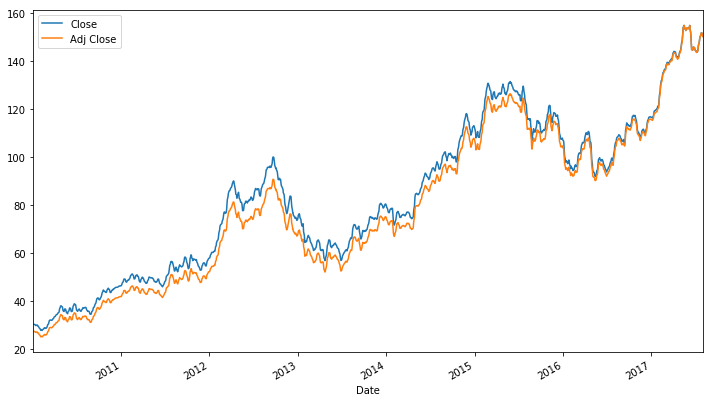

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

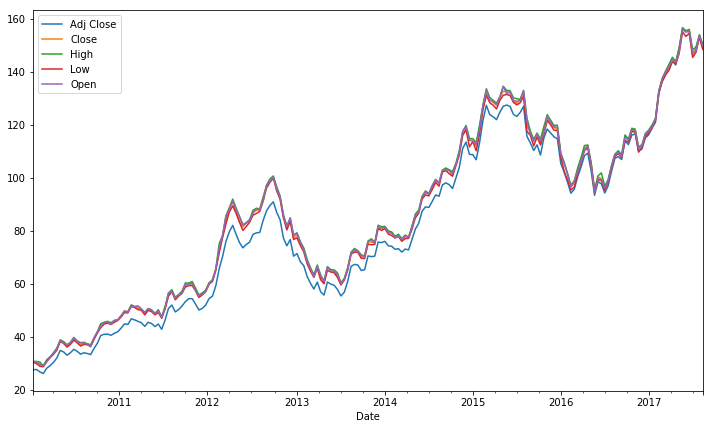

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

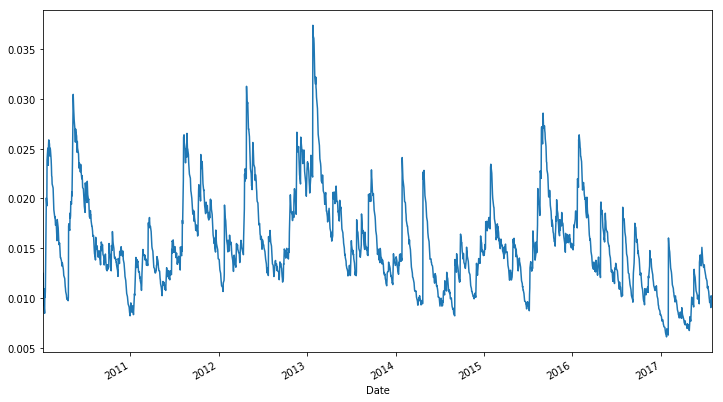

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [4]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/demos/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [6]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

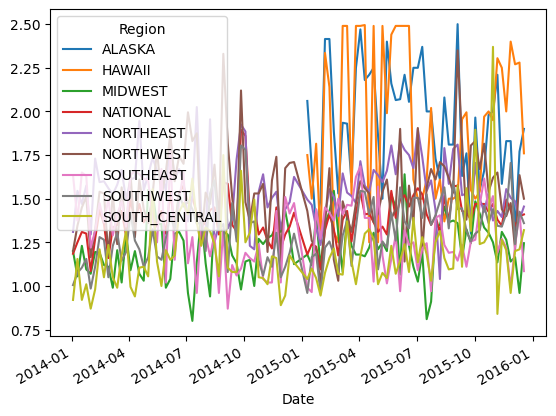

In [5]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [7]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

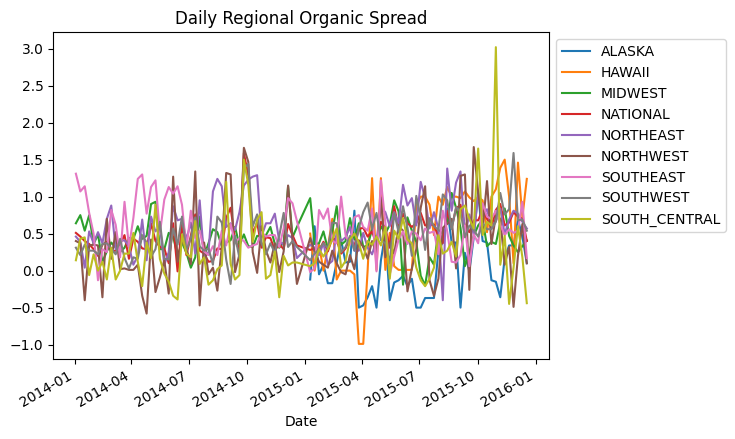

In [10]:
import matplotlib.pyplot as plt
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [11]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


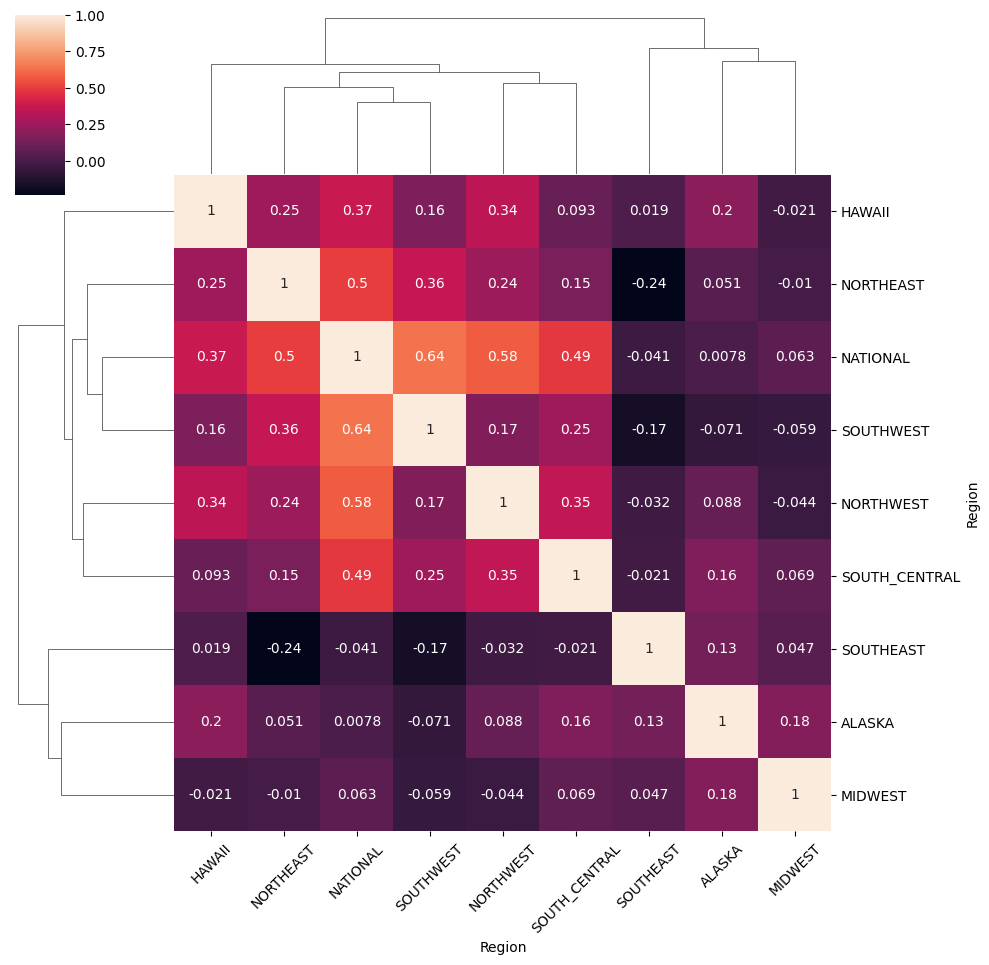

In [12]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

**My own example 34**

In [14]:
import requests
import pandas as pd

a = requests.get('https://www.datos.gov.co/resource/9gen-fx5m.json')
Data = a.json()
df = pd.DataFrame(Data)
display(df)

,vigencia,tipo_hecho,genero,estado_civil,nacionalidad,depa_pro_colegio,ciudad_pro_colegio,depa_resi,ciudad_resi,modalidad,...,programa,semestre,sede,condicion_estudiante,colegio,naturaleza_colegio,raza,discapacidad,eps,estrato
0,2019-2,Inscrito,Hombre,Soltero,Colombiano,Cundinamarca,San Francisco,Quindío,La Tebaida,Pregrado,...,Ing. de Sistemas y Computacion,Sin info,Armenia,Sin info,CORPORACIÓN EDUCATIVA SAN FRANCISCO CORESAF,Privada,Mestiza,NO APLICA,SISBEN,2
1,2019-2,Inscrito,Hombre,Union Libre,Colombiano,Quindío,Armenia,Quindío,Armenia,Pregrado,...,Seguridad y Salud en el Trabajo,Sin info,Pereira,Sin info,COLEGIO COMFENALCO,Privada,Mestiza,NO APLICA,SANITAS EPS,3
2,2019-2,Inscrito,Hombre,Soltero,Colombiano,Quindío,La Tebaida,Quindío,La Tebaida,Pregrado,...,Tec. en instrumentacion electronica,Sin info,Armenia,Sin info,INST TEBAIDA,Oficial,Blanca,NO APLICA,COOMEVA EPS,1
3,2019-2,Inscrito,Hombre,Soltero,Colombiano,Quindío,Armenia,Quindío,Armenia,Pregrado,...,Contaduria Publica,Sin info,Armenia,Sin info,INEM JOSE CELESTINO MUTIS,Oficial,Blanca,NO APLICA,SERVICIOOCCIDENTALDESALUD,1
4,2019-2,Inscrito,Hombre,Casado,Colombiano,Quindío,Cordoba,Quindío,Cordoba,Pregrado,...,Tec. en Obras Civiles,Sin info,Armenia,Sin info,CIUDELA JOSE MARIA CORDOBA,Oficial,Mestiza,NO APLICA,SURA,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-2,Inscrito,Mujer,Soltero,Colombiano,Quindío,Armenia,Quindío,Armenia,Pregrado,...,Lic. en Ciencias Naturales y Edu. Ambiental,Sin info,Armenia,Sin info,LOS QUINDOS,Oficial,Blanca,NO APLICA,MINISTERIO DE DEFENSA - POLICÍA NACIONAL,2
996,2019-2,Inscrito,Mujer,Soltero,Colombiano,Quindío,Filandia,Quindío,Calarca,Pregrado,...,Artes Visuales,Sin info,Armenia,Sin info,SAGRADO CORAZON DE JESUS,Oficial,Blanca,NO APLICA,OTRO,2
997,2019-2,Inscrito,Mujer,Soltero,Colombiano,Quindío,Filandia,Quindío,Calarca,Pregrado,...,Trabajo Social,Sin info,Armenia,Sin info,SAGRADO CORAZON DE JESUS,Oficial,Blanca,NO APLICA,OTRO,2
998,2019-2,Inscrito,Mujer,Soltero,Colombiano,Quindío,Armenia,Quindío,Armenia,Pregrado,...,Ingenieria Civil,Sin info,Armenia,Sin info,ESCUELA NORMAL SUPERIOR,Oficial,Blanca,NO APLICA,MINISTERIO DE DEFENSA - POLICÍA NACIONAL,3


**My own example 35**

In [15]:
Ingenieros_de_Sistemas = df.loc[df['programa'] == 'Ing. de Sistemas y Computacion']
display(Ingenieros_de_Sistemas)

,vigencia,tipo_hecho,genero,estado_civil,nacionalidad,depa_pro_colegio,ciudad_pro_colegio,depa_resi,ciudad_resi,modalidad,...,programa,semestre,sede,condicion_estudiante,colegio,naturaleza_colegio,raza,discapacidad,eps,estrato
0,2019-2,Inscrito,Hombre,Soltero,Colombiano,Cundinamarca,San Francisco,Quindío,La Tebaida,Pregrado,...,Ing. de Sistemas y Computacion,Sin info,Armenia,Sin info,CORPORACIÓN EDUCATIVA SAN FRANCISCO CORESAF,Privada,Mestiza,NO APLICA,SISBEN,2
41,2019-2,Inscrito,Hombre,Union Libre,Colombiano,Quindío,Armenia,Quindío,Armenia,Pregrado,...,Ing. de Sistemas y Computacion,Sin info,Armenia,Sin info,RUFINO JOSE CUERVO CENTRO,Oficial,Blanca,NO APLICA,CAFÉ SALUD,1
54,2019-2,Inscrito,Hombre,Casado,Colombiano,Quindío,Armenia,Quindío,Armenia,Pregrado,...,Ing. de Sistemas y Computacion,Sin info,Armenia,Sin info,REPUBLICA DE FRANCIA,Oficial,Mestiza,NO APLICA,CAFESALUD,1
85,2019-2,Inscrito,Hombre,Casado,Colombiano,Valle Del Cauca,Buga,Quindío,La Tebaida,Pregrado,...,Ing. de Sistemas y Computacion,Sin info,Armenia,Sin info,COL ALONSO ARAGON QUINTERO,Privada,Mestiza,NO APLICA,MINISTERIO DE DEFENSA - POLICÍA NACIONAL,2
475,2019-2,Inscrito,Hombre,Casado,Colombiano,Valle Del Cauca,Zarzal,Quindío,Armenia,Pregrado,...,Ing. de Sistemas y Computacion,Sin info,Armenia,Sin info,IE SIMON BOLIVAR,Oficial,Blanca,NO APLICA,SURA,3
496,2019-2,Inscrito,Hombre,Soltero,Colombiano,Quindío,Armenia,Quindío,Armenia,Pregrado,...,Ing. de Sistemas y Computacion,Sin info,Armenia,Sin info,CIUDADELA DE OCCIDENTE,Oficial,Mestiza,NO APLICA,NUEVA EPS,3
502,2019-2,Inscrito,Mujer,Soltero,Colombiano,Quindío,Armenia,Quindío,Armenia,Pregrado,...,Ing. de Sistemas y Computacion,Sin info,Armenia,Sin info,INSTITUTO TECNICO INDUSTRIAL,Oficial,Mestiza,NO APLICA,NUEVA EPS,1
511,2019-2,Inscrito,Mujer,Soltero,Colombiano,Cundinamarca,Bogotá D.C.,Tolima,Ibague,Pregrado,...,Ing. de Sistemas y Computacion,Sin info,Armenia,Sin info,COLEGIO CEDID SAN PABLO (IED),Oficial,Blanca,BAJA VISIÓN DIAGNOSTICADA,SANITAS EPS,2
521,2019-2,Inscrito,Hombre,Soltero,Colombiano,Cundinamarca,Bogotá D.C.,Quindío,Armenia,Pregrado,...,Ing. de Sistemas y Computacion,Sin info,Armenia,Sin info,COLEGIO MANUELA AYALA DE GAITAN (IED),Oficial,Blanca,NO APLICA,CRUZ BLANCA,2
530,2019-2,Inscrito,Hombre,Otro,Colombiano,Cundinamarca,Bogotá D.C.,Quindío,Armenia,Pregrado,...,Ing. de Sistemas y Computacion,Sin info,Armenia,Sin info,COLEGIO ROBERT F. KENNEDY (IED),Oficial,Mestiza,NO APLICA,OTRO,3


**My own example 36**

In [16]:
df.dtypes

vigencia                object
tipo_hecho              object
genero                  object
estado_civil            object
nacionalidad            object
depa_pro_colegio        object
ciudad_pro_colegio      object
depa_resi               object
ciudad_resi             object
modalidad               object
metodologia             object
jornada                 object
facultad                object
programa                object
semestre                object
sede                    object
condicion_estudiante    object
colegio                 object
naturaleza_colegio      object
raza                    object
discapacidad            object
eps                     object
estrato                 object
dtype: object

**My own example 37**

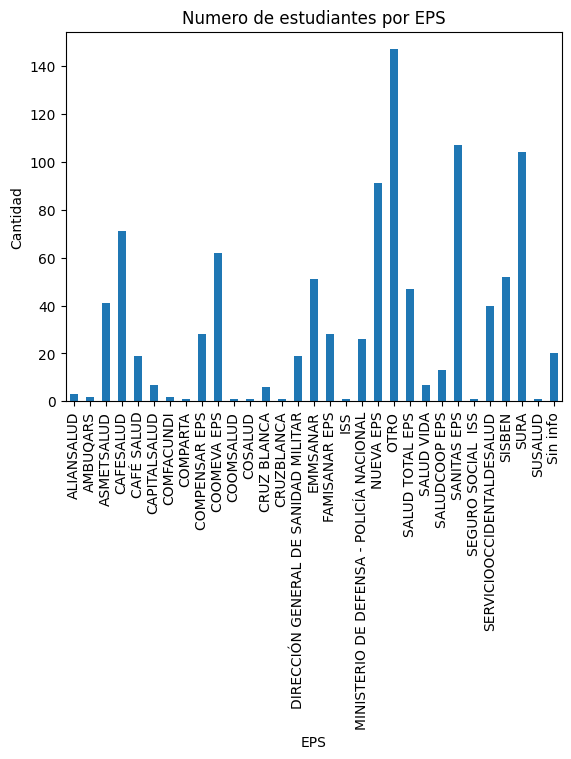

In [48]:
import matplotlib.pyplot as plt
eps = df.groupby('eps')['estrato'].count()
eps.plot(kind='bar')
plt.title('Numero de estudiantes por EPS')
plt.xlabel('EPS')
plt.ylabel('Cantidad')
plt.show()

**My own example 38**

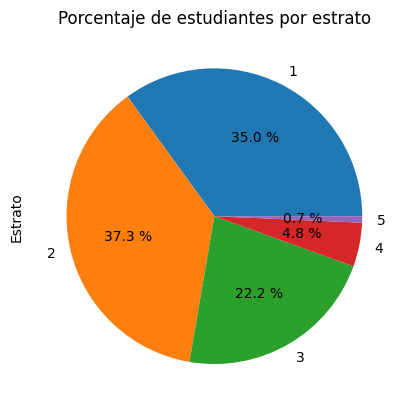

In [37]:
import matplotlib.pyplot as plt
estrato = df.groupby('estrato')['estrato'].count()
estrato.plot(kind='pie',autopct="%0.1f %%")
plt.title('Porcentaje de estudiantes por estrato')

plt.ylabel('Estrato')
plt.show()

**My own example 39**

In [49]:
Estudiantes_por_Carrera = df.groupby('programa')['vigencia'].count()
print(Estudiantes_por_Carrera)

programa
Administracion Negocios Presencial                                  27
Admon. Financiera                                                   36
Admon. negocios distancia                                           29
Artes Visuales                                                       7
Biologia                                                            32
CIDBA                                                              203
Comunicacion Social-Periodismo                                      25
Contaduria Publica                                                  56
Doctorado en Ciencias Biomedicas                                     5
Doctorado en Ciencias de la Educacion                               11
Economia                                                            18
Especializacion en Pediatria                                         9
Filosofia                                                            3
Fisica                                                              

# Thanks!